# Calpis Water detection Mask R-CNN

A quick intro to using the pre-trained model to detect and segment objects.

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import imghdr
import cv2

import skimage.io


# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.numberplate import numberplate

#matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

# Path to pre-trained weights
NUMBERPLATE_WEIGHTS_PATH = "../weights/mask_rcnn_numberplate.h5"  # TODO: update this path

c:\app\anaconda\envs\tensorflow-python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [2]:
class InferenceConfig(numberplate.NumberPlateConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MIN

## Create Model and Load Trained Weights

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load pre-trained weights
model.load_weights(NUMBERPLATE_WEIGHTS_PATH, by_name=True)

## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. Some datasets assign integer values to their classes and some don't. For example, in the MS-COCO dataset, the 'person' class is 1 and 'teddy bear' is 88. The IDs are often sequential, but not always. The COCO dataset, for example, has classes associated with class IDs 70 and 72, but not 71.

In [4]:
# Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'numberplate']

## Run Object Detection

LOGGING:::::: Start
LOGGING:::::: Date: 2018/05/22
LOGGING:::::: Loading image: <DirEntry '3D-007.jpg'>
LOGGING:::::: Dir name: C:\Users\h-chou\Documents\Github\number_plate_masking\images
LOGGING:::::: File name: 3D-007.jpg
LOGGING:::::: Saved as: C:\Users\h-chou\Documents\Github\number_plate_masking\images\masked\3D-007.jpg
LOGGING:::::: Processing 1 images
LOGGING:::::: image      shape: (478, 640, 3)         min:    0.00000  max:  255.00000  uint8
LOGGING:::::: molded_imagesshape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
LOGGING:::::: image_metasshape: (1, 14)               min:    0.00000  max:  640.00000  float64
LOGGING:::::: anchors    shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


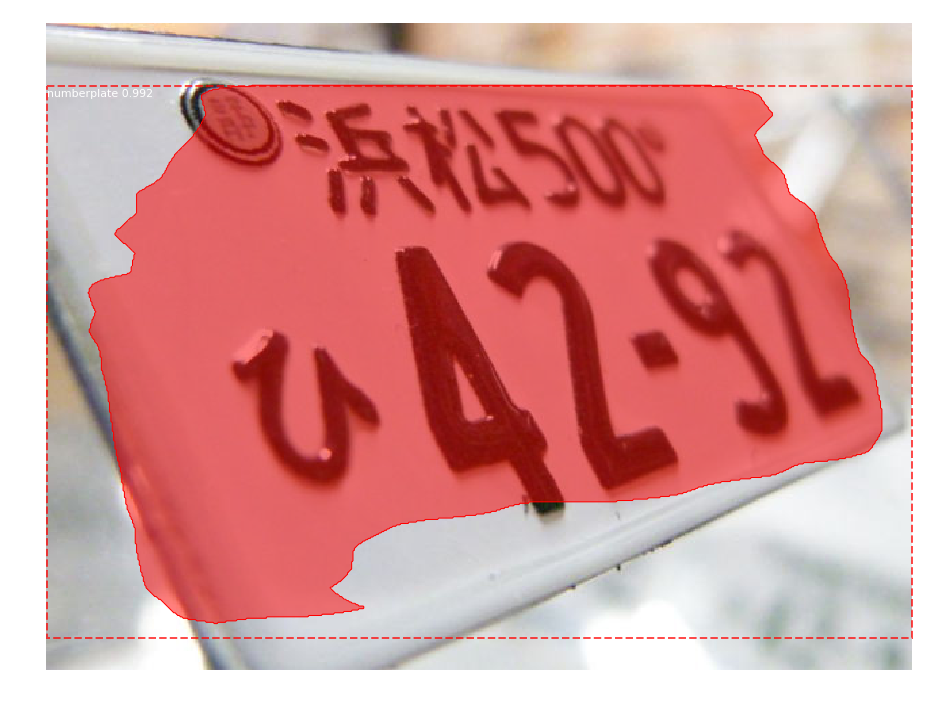

LOGGING:::::: Completed in 8.580879 sec
LOGGING:::::: End

LOGGING:::::: Start
LOGGING:::::: Date: 2018/05/22
LOGGING:::::: Loading image: <DirEntry '58f02a79eda1d_193532217.jpg'>
LOGGING:::::: Dir name: C:\Users\h-chou\Documents\Github\number_plate_masking\images
LOGGING:::::: File name: 58f02a79eda1d_193532217.jpg
LOGGING:::::: Saved as: C:\Users\h-chou\Documents\Github\number_plate_masking\images\masked\58f02a79eda1d_193532217.jpg
LOGGING:::::: Processing 1 images
LOGGING:::::: image      shape: (391, 746, 3)         min:    0.00000  max:  255.00000  uint8
LOGGING:::::: molded_imagesshape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
LOGGING:::::: image_metasshape: (1, 14)               min:    0.00000  max:  746.00000  float64
LOGGING:::::: anchors    shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


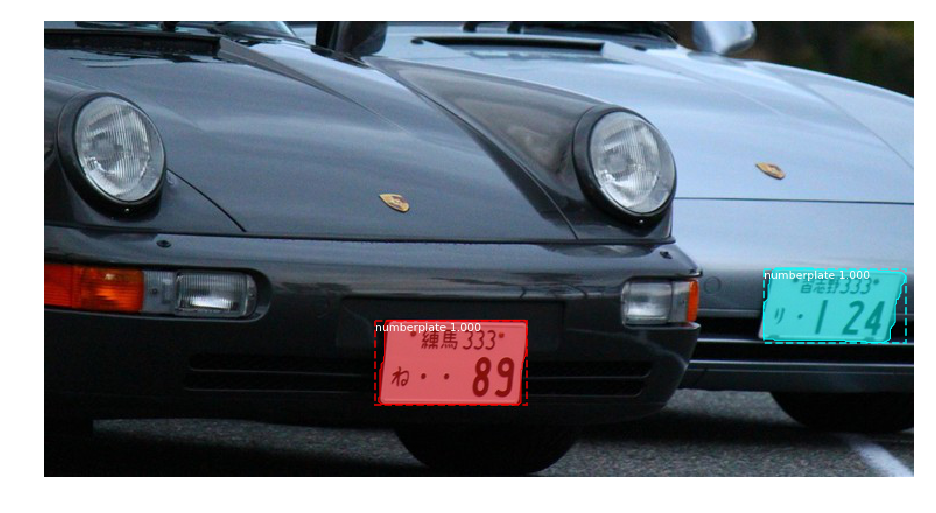

LOGGING:::::: Completed in 7.733875 sec
LOGGING:::::: End

LOGGING:::::: Start
LOGGING:::::: Date: 2018/05/22
LOGGING:::::: Loading image: <DirEntry 'fp02.jpg'>
LOGGING:::::: Dir name: C:\Users\h-chou\Documents\Github\number_plate_masking\images
LOGGING:::::: File name: fp02.jpg
LOGGING:::::: Saved as: C:\Users\h-chou\Documents\Github\number_plate_masking\images\masked\fp02.jpg
LOGGING:::::: Processing 1 images
LOGGING:::::: image      shape: (408, 612, 3)         min:    0.00000  max:  255.00000  uint8
LOGGING:::::: molded_imagesshape: (1, 512, 512, 3)      min: -123.70000  max:  140.10000  float64
LOGGING:::::: image_metasshape: (1, 14)               min:    0.00000  max:  612.00000  float64
LOGGING:::::: anchors    shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32

*** No instances to display *** 



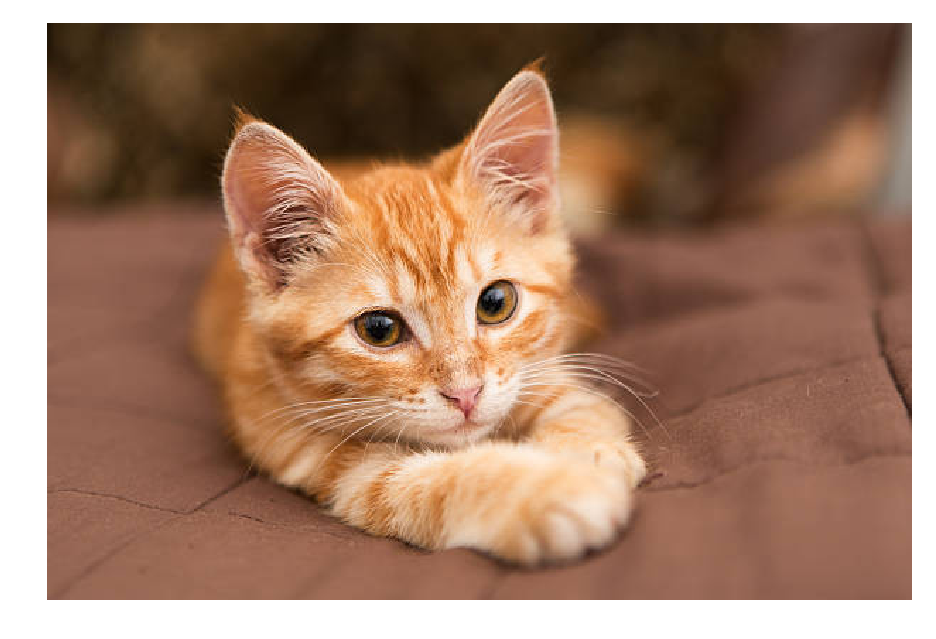

LOGGING:::::: Completed in 7.568877 sec
LOGGING:::::: End

LOGGING:::::: Start
LOGGING:::::: Date: 2018/05/22
LOGGING:::::: Loading image: <DirEntry 'np_train (114).jpg'>
LOGGING:::::: Dir name: C:\Users\h-chou\Documents\Github\number_plate_masking\images
LOGGING:::::: File name: np_train (114).jpg
LOGGING:::::: Saved as: C:\Users\h-chou\Documents\Github\number_plate_masking\images\masked\np_train (114).jpg
LOGGING:::::: Processing 1 images
LOGGING:::::: image      shape: (600, 800, 3)         min:    0.00000  max:  255.00000  uint8
LOGGING:::::: molded_imagesshape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
LOGGING:::::: image_metasshape: (1, 14)               min:    0.00000  max:  800.00000  float64
LOGGING:::::: anchors    shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


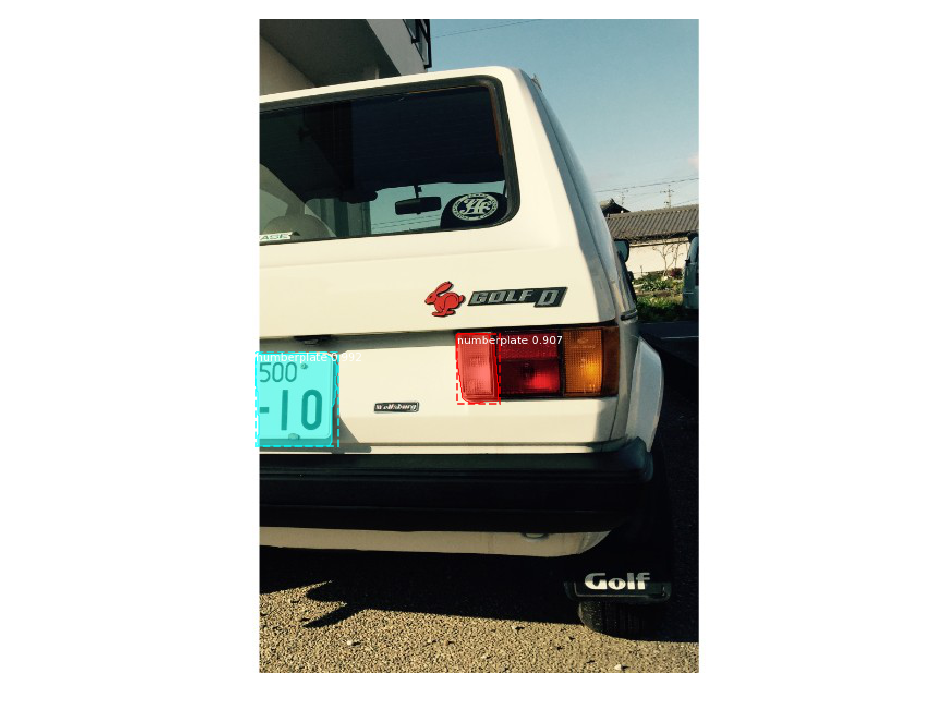

LOGGING:::::: Completed in 7.525505 sec
LOGGING:::::: End

LOGGING:::::: Start
LOGGING:::::: Date: 2018/05/22
LOGGING:::::: Loading image: <DirEntry 'np_train (46).jpg'>
LOGGING:::::: Dir name: C:\Users\h-chou\Documents\Github\number_plate_masking\images
LOGGING:::::: File name: np_train (46).jpg
LOGGING:::::: Saved as: C:\Users\h-chou\Documents\Github\number_plate_masking\images\masked\np_train (46).jpg
LOGGING:::::: Processing 1 images
LOGGING:::::: image      shape: (600, 800, 3)         min:    0.00000  max:  255.00000  uint8
LOGGING:::::: molded_imagesshape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
LOGGING:::::: image_metasshape: (1, 14)               min:    0.00000  max:  800.00000  float64
LOGGING:::::: anchors    shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


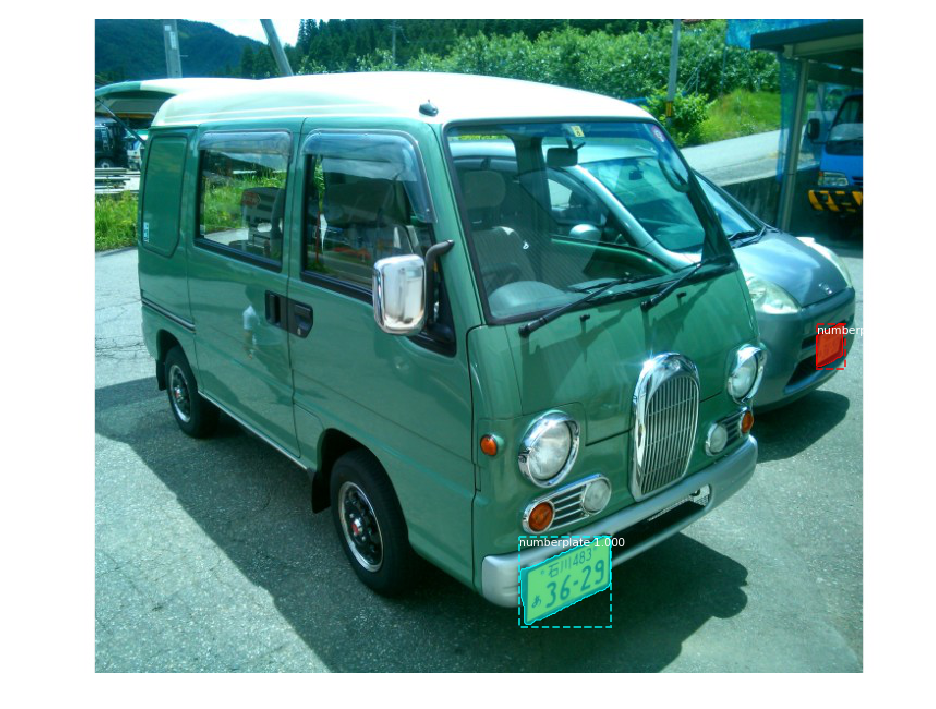

LOGGING:::::: Completed in 7.936068 sec
LOGGING:::::: End

LOGGING:::::: Start
LOGGING:::::: Date: 2018/05/22
LOGGING:::::: Loading image: <DirEntry 'np_train (50).jpg'>
LOGGING:::::: Dir name: C:\Users\h-chou\Documents\Github\number_plate_masking\images
LOGGING:::::: File name: np_train (50).jpg
LOGGING:::::: Saved as: C:\Users\h-chou\Documents\Github\number_plate_masking\images\masked\np_train (50).jpg
LOGGING:::::: Processing 1 images
LOGGING:::::: image      shape: (600, 800, 3)         min:    0.00000  max:  255.00000  uint8
LOGGING:::::: molded_imagesshape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
LOGGING:::::: image_metasshape: (1, 14)               min:    0.00000  max:  800.00000  float64
LOGGING:::::: anchors    shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


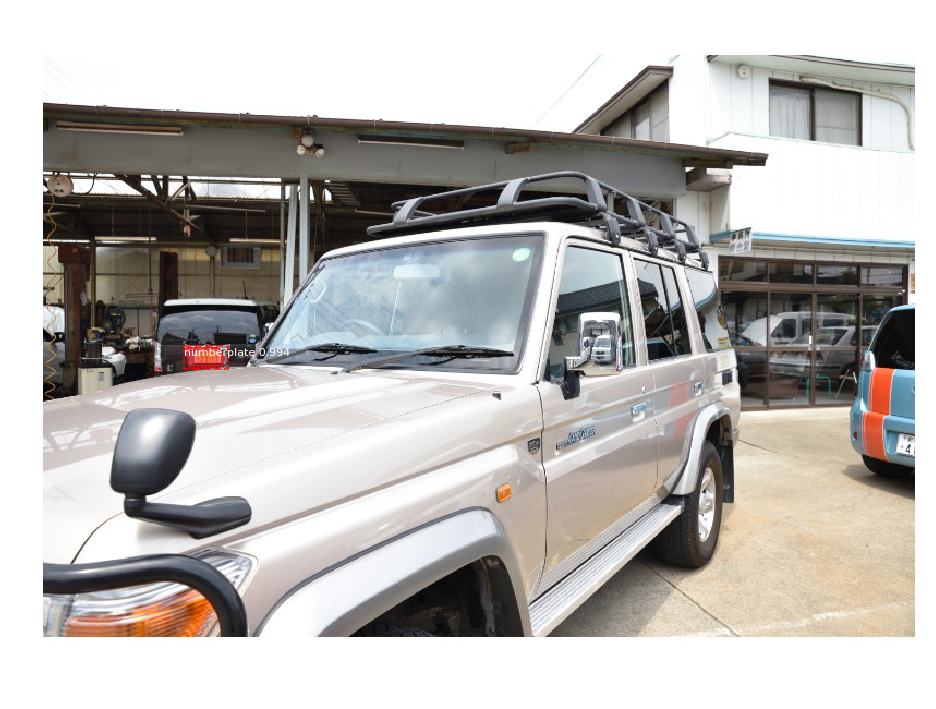

LOGGING:::::: Completed in 7.260293 sec
LOGGING:::::: End

LOGGING:::::: Start
LOGGING:::::: Date: 2018/05/22
LOGGING:::::: Loading image: <DirEntry 'np_train (55).jpg'>
LOGGING:::::: Dir name: C:\Users\h-chou\Documents\Github\number_plate_masking\images
LOGGING:::::: File name: np_train (55).jpg
LOGGING:::::: Saved as: C:\Users\h-chou\Documents\Github\number_plate_masking\images\masked\np_train (55).jpg
LOGGING:::::: Processing 1 images
LOGGING:::::: image      shape: (600, 800, 3)         min:    0.00000  max:  255.00000  uint8
LOGGING:::::: molded_imagesshape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
LOGGING:::::: image_metasshape: (1, 14)               min:    0.00000  max:  800.00000  float64
LOGGING:::::: anchors    shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


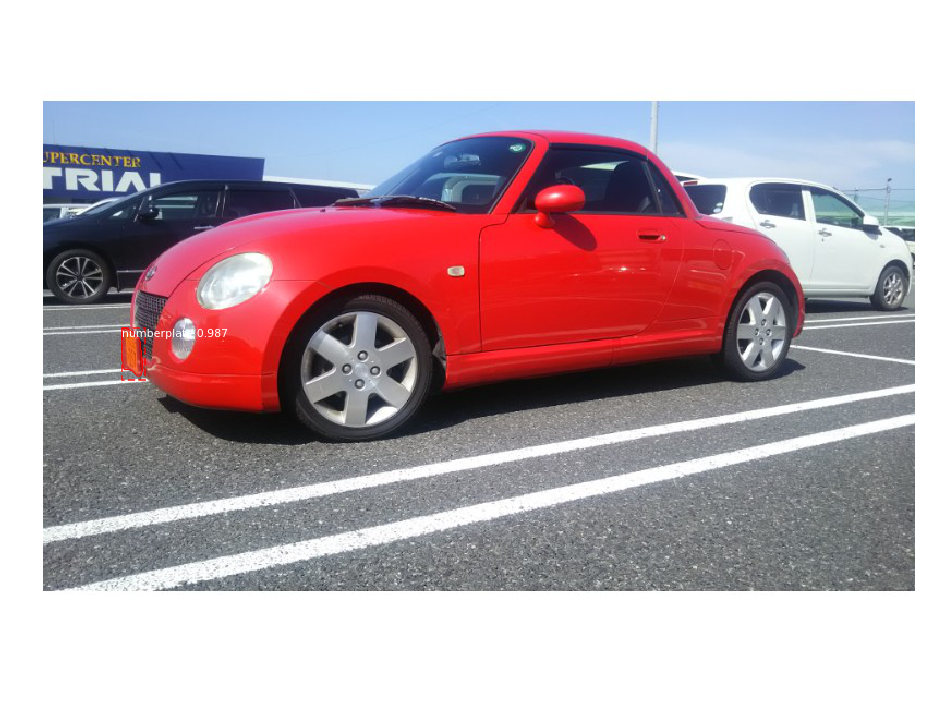

LOGGING:::::: Completed in 7.557789 sec
LOGGING:::::: End

LOGGING:::::: Start
LOGGING:::::: Date: 2018/05/22
LOGGING:::::: Loading image: <DirEntry 'np_train (91).jpg'>
LOGGING:::::: Dir name: C:\Users\h-chou\Documents\Github\number_plate_masking\images
LOGGING:::::: File name: np_train (91).jpg
LOGGING:::::: Saved as: C:\Users\h-chou\Documents\Github\number_plate_masking\images\masked\np_train (91).jpg
LOGGING:::::: Processing 1 images
LOGGING:::::: image      shape: (600, 800, 3)         min:    0.00000  max:  255.00000  uint8
LOGGING:::::: molded_imagesshape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
LOGGING:::::: image_metasshape: (1, 14)               min:    0.00000  max:  800.00000  float64
LOGGING:::::: anchors    shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


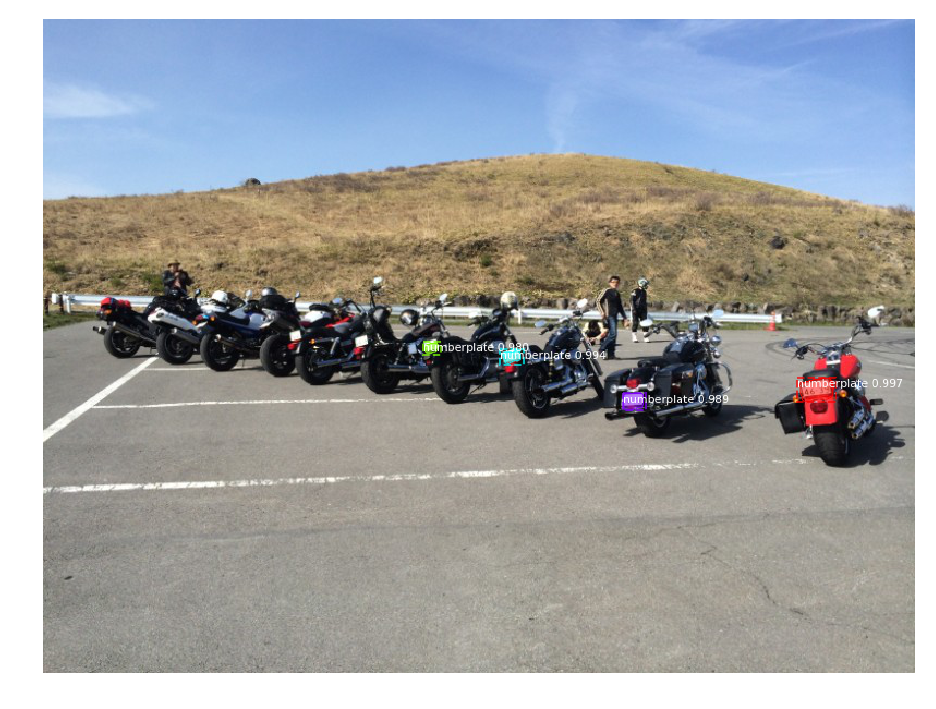

LOGGING:::::: Completed in 9.848872 sec
LOGGING:::::: End

LOGGING:::::: Start
LOGGING:::::: Date: 2018/05/22
LOGGING:::::: Loading image: <DirEntry '図1.jpg'>
LOGGING:::::: Dir name: C:\Users\h-chou\Documents\Github\number_plate_masking\images
LOGGING:::::: File name: 図1.jpg
LOGGING:::::: Saved as: C:\Users\h-chou\Documents\Github\number_plate_masking\images\masked\図1.jpg
LOGGING:::::: Processing 1 images
LOGGING:::::: image      shape: (404, 539, 3)         min:    0.00000  max:  255.00000  uint8
LOGGING:::::: molded_imagesshape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
LOGGING:::::: image_metasshape: (1, 14)               min:    0.00000  max:  539.00000  float64
LOGGING:::::: anchors    shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


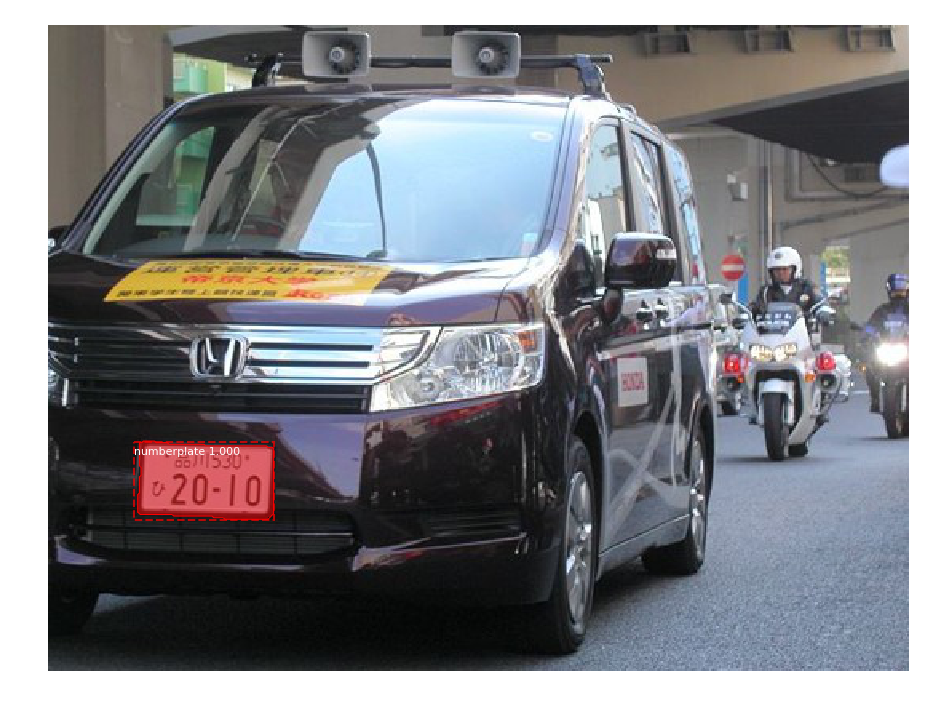

LOGGING:::::: Completed in 8.756366 sec
LOGGING:::::: End



In [6]:
# Load every image from destination folder and apply mask then save images

# validation images extension
image_type_ok_list = ['jpeg','png','gif','bmp']

# loop every file in the folder
for file_names in os.scandir(IMAGE_DIR):
    if file_names.is_file():
        image_type = imghdr.what(file_names)
        if image_type in image_type_ok_list:
            # start
            print('============================')
            print('LOGGING:::::: Start')

            # date time log
            img_timestamp = time.localtime()
            time_string = str.join('/',(str(img_timestamp.tm_year), str(img_timestamp.tm_mon).zfill(2), str(img_timestamp.tm_mday).zfill(2)))
            print('LOGGING:::::: Date:',time_string)

            # filename filepath log
            filename = os.path.join(IMAGE_DIR, file_names)
            print('LOGGING:::::: Loading image:',file_names)

            base_file_name = os.path.basename(filename)
            base_dir_name = os.path.dirname(filename)
            print('LOGGING:::::: Dir name:',base_dir_name)
            print('LOGGING:::::: File name:',base_file_name)
            split_file_name, split_file_ext = os.path.splitext(base_file_name)
            saved_dir_name = 'masked'
            saved_file_name = str.join('\\', (base_dir_name, saved_dir_name, base_file_name))
            print('LOGGING:::::: Saved as:',saved_file_name)

            # convert png with alpha channel with shape[2] == 4 into shape[2] ==3 RGB images
            image = skimage.io.imread(filename)
            if len(image.shape) > 2 and image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

            # processing time log
            t0 = time.perf_counter()

            # Run detection
            results = model.detect([image], verbose=1)
            r = results[0]

            # without displaying images for batch program
            print_img = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
            skimage.io.imsave(saved_file_name,print_img)

            # just apply mask then save images
            ###print_img = visualize.apply_mask_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
            ###skimage.io.imsave(saved_file_name,print_img)

            # processing time log
            t1 = time.perf_counter()
            print('LOGGING:::::: Completed in %f sec'%(t1-t0))
            print('LOGGING:::::: End\n')
            print('============================')
            # end
